# Polycrystalline graphene



In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from psm.segments import Segments
from psm.build import lattice_segment
from psm import plotutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sample Structure

In [41]:
points = np.load('data/poly_graphene.npy')

segments = Segments(points)
segments.build_graph(1)

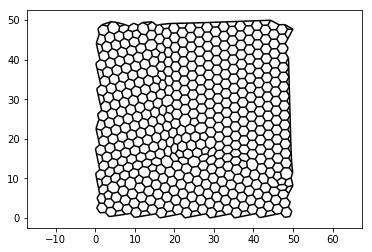

In [42]:
segments.show_edges()

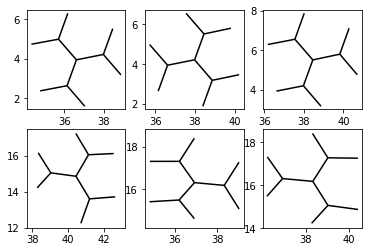

In [18]:
segments.traversals(max_depth=3)
segments.show(6, nrows=2);

## Template structure

In [19]:
from psm.match import order_segments

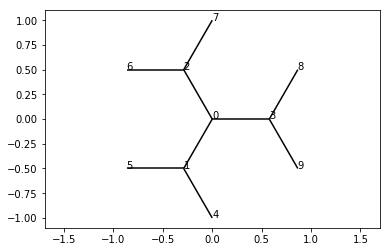

In [30]:
a = [0, 1]
b = [np.sin(2/3*np.pi), np.cos(2/3*np.pi)]
basis = [[0,0],[1/np.sqrt(3), 0]]

templates = lattice_segment(a, b, basis=basis, min_alpha=.8, max_depth=3)

templates = order_segments(templates)

templates.show(show_order = True);

## Pairing

In [31]:
rmsd = segments.register(templates, transform='similarity', pivot='front')

 [||||||||||||||||||||] 1029/1029 registrations


In [32]:
best_rmsd

array([nan, nan, nan, ..., nan, nan, nan])

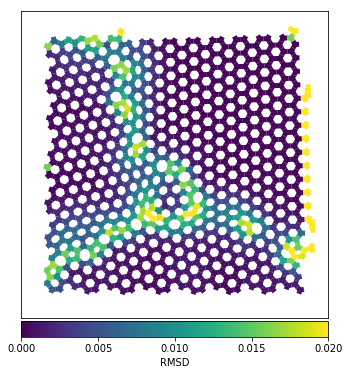

In [36]:
_, best_rmsd = segments.best_matches()

fig, ax = plt.subplots(1, 1, figsize=(6,6))

plotutils.edge_plot(segments, ax=ax, c=best_rmsd, color_mode='ends', vmin=0, vmax=.08, linewidth=5)
plotutils.add_colorbar(ax, label='RMSD', cmap='viridis', vmin=0, vmax=.02)

ax.axis('equal')
ax.set_xticks([])
ax.set_yticks([]);

## Strain

In [37]:
strain, rotation = segments.calc_strain(adjust_zero='median', rmsd_max=.1)

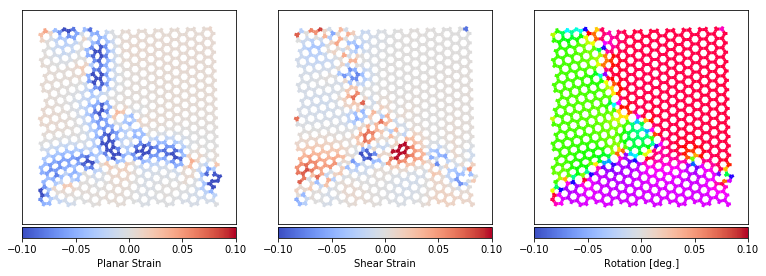

In [38]:
rotation[np.isnan(rotation)==False] = rotation[np.isnan(rotation)==False] % (np.pi/3)
planar = np.trace(strain, axis1=1, axis2=2) / 2

fig,axes = plt.subplots(1,3,figsize=(13,6))

plotutils.edge_plot(segments, ax=axes[0], c=planar, color_mode='ends', cmap='coolwarm', vmin=-.1, vmax=.1, linewidth=3)
plotutils.add_colorbar(axes[0], label='Planar Strain', cmap='coolwarm', vmin=-.1, vmax=.1)

plotutils.edge_plot(segments, ax=axes[1], c=strain[:,0,1], color_mode='ends', cmap='coolwarm', vmin=-.1, vmax=.1, linewidth=3)
plotutils.add_colorbar(axes[1], label='Shear Strain', cmap='coolwarm', vmin=-.1, vmax=.1)

plotutils.edge_plot(segments, ax=axes[2], c=rotation / np.pi * 180, color_mode='ends', cmap='hsv', 
                    vmin=0, vmax=60, linewidth=3)
plotutils.add_colorbar(axes[2], label='Rotation [deg.]', cmap='coolwarm', vmin=-.1, vmax=.1)

for ax in axes:
    ax.axis('equal'); ax.set_xticks([]); ax.set_yticks([])